In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.model_selection import RandomizedSearchCV
import math
import xgboost as xg
np.random.seed(0)

In [2]:
import os
import pandas as pd

folder_path = "F:\Intern\9961_14084_bundle_archive"
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        print(f"File name: **{filename}**\n")
        print(df.head())


File name: **Test.csv**

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0          

In [3]:
import os
import pandas as pd

folder_path = "F:\Intern\9961_14084_bundle_archive"
df1 = pd.read_csv(os.path.join(folder_path, 'Test.csv'))
df = pd.read_csv(os.path.join(folder_path, 'Train.csv'))


In [4]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Data Analysis and preprocessing

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Here Df is Train Dataset and Df1 is the Test Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
print("Describing the train data:")
display(df.describe(include="all"))

Describing the train data:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [11]:
print("Describing the test data:")
display(df1.describe(include="all"))

Describing the test data:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,4705.000000,5681,5681.000000,5681,5681.000000,5681,5681.000000,4075,5681,5681
unique,1543,NaN,5,NaN,16,NaN,10,NaN,3,3,4
top,DRF48,NaN,Low Fat,NaN,Snack Foods,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,8,NaN,3396,NaN,789,NaN,624,NaN,1862,2233,3717
mean,NaN,12.695633,NaN,0.065684,NaN,141.023273,NaN,1997.828903,NaN,NaN,NaN
std,NaN,4.664849,NaN,0.051252,NaN,61.809091,NaN,8.372256,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,8.645000,NaN,0.027047,NaN,94.412000,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.500000,NaN,0.054154,NaN,141.415400,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,16.700000,NaN,0.093463,NaN,186.026600,NaN,2004.000000,NaN,NaN,NaN


In [12]:
print("Checking the outlet establishment year:")
print("Uniques:")
display(df["Outlet_Establishment_Year"].unique())
print("Data type:")
display(df["Outlet_Establishment_Year"].dtype)

Checking the outlet establishment year:
Uniques:


array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

Data type:


dtype('int64')

# Data Visualization

Visualizing Quantitative Data Spread


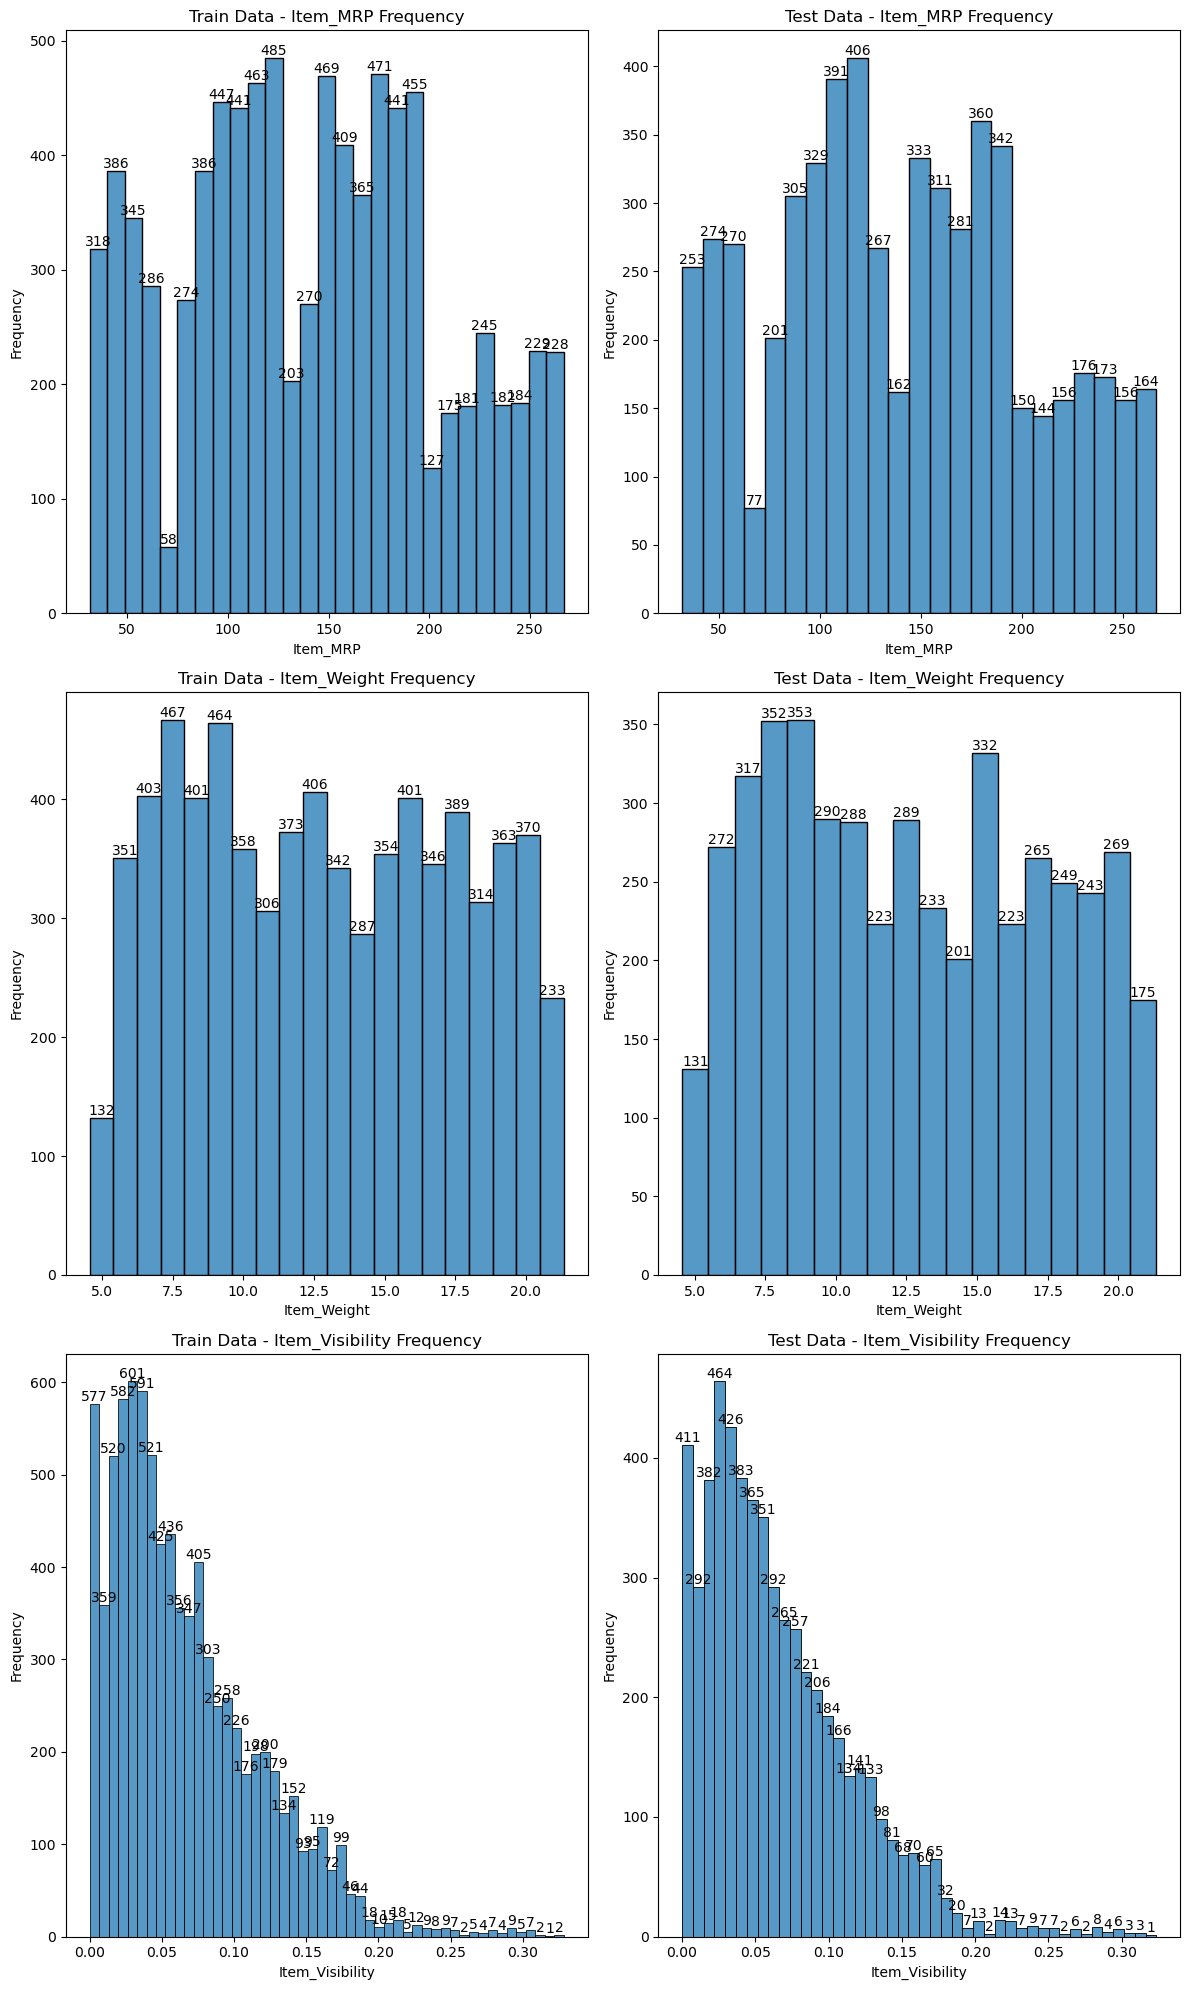

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(12, 20))
columns = ["Item_MRP", "Item_Weight", "Item_Visibility"]
print("Visualizing Quantitative Data Spread")
for i, label in enumerate(columns):
    row = i 
    ax1 = sns.histplot(df[label], ax=axes[row, 0])
    ax1.set_xlabel(label)
    ax1.set_ylabel("Frequency")
    ax1.set_title(f"Train Data - {label} Frequency")
    for container in ax1.containers:
        ax1.bar_label(container, label_type="edge")
    ax2 = sns.histplot(df1[label], ax=axes[row, 1])
    ax2.set_xlabel(label)
    ax2.set_ylabel("Frequency")
    ax2.set_title(f"Test Data - {label} Frequency")
    for container in ax2.containers:
        ax2.bar_label(container, label_type="edge")
plt.tight_layout()
plt.show()

Visualizing Discrete Data Spread


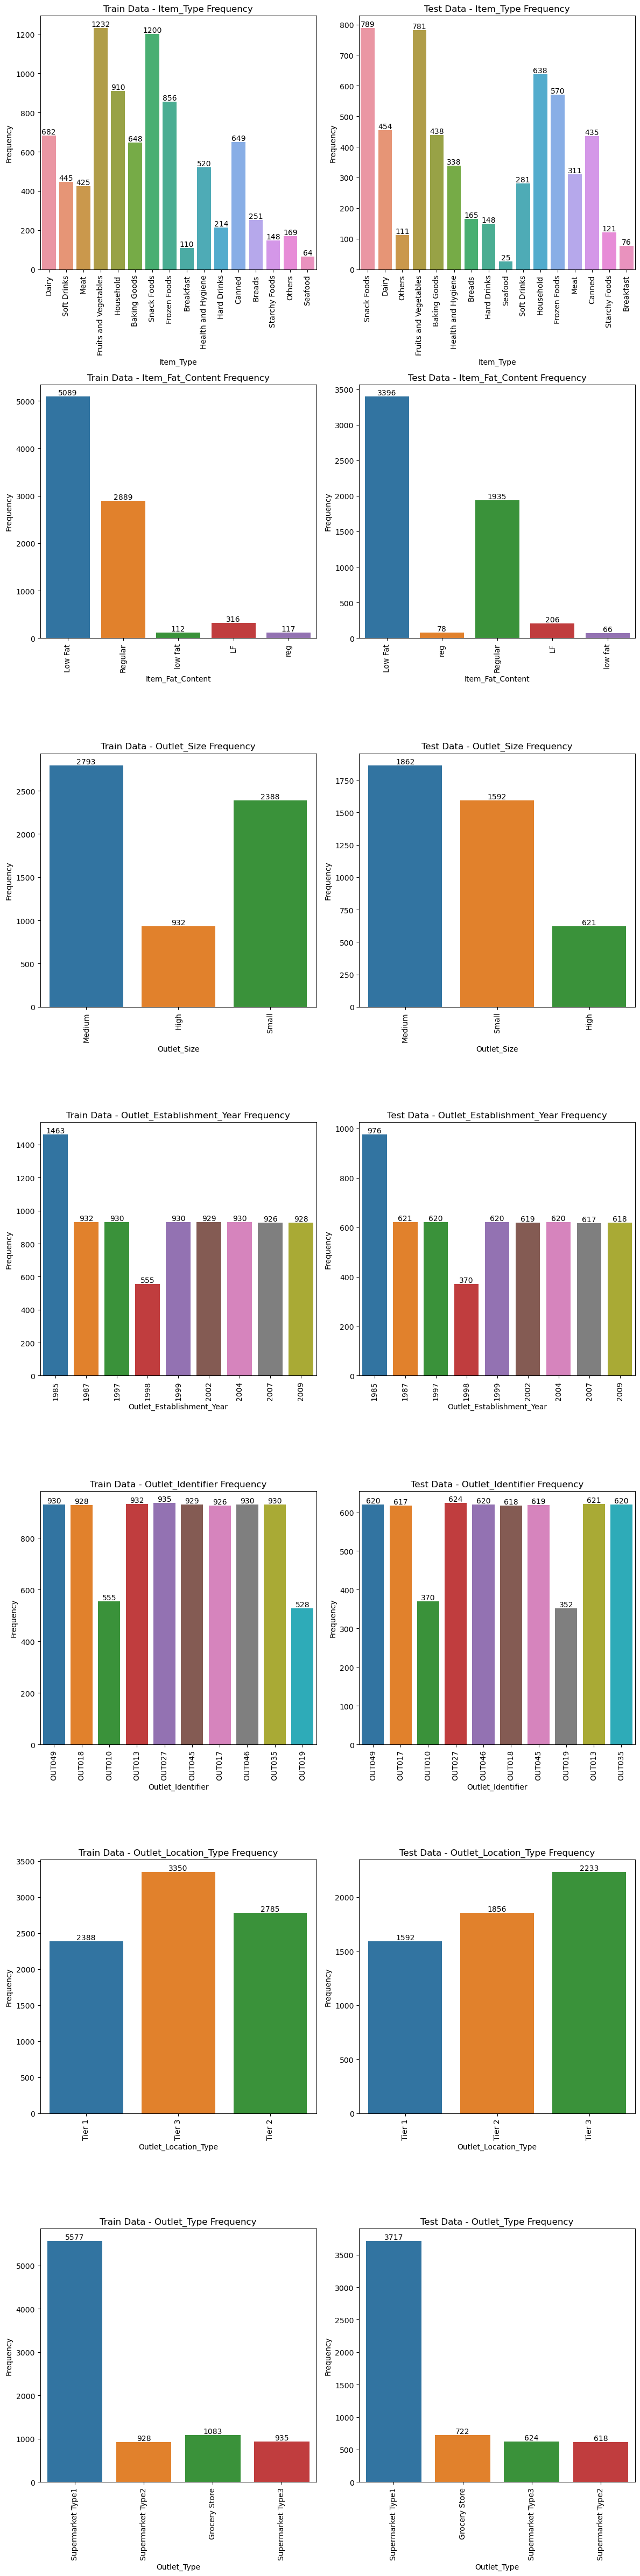

In [14]:
fig, axes = plt.subplots(7, 2, figsize=(12, 48))
columns = ["Item_Type", "Item_Fat_Content", "Outlet_Size", "Outlet_Establishment_Year", "Outlet_Identifier",
           "Outlet_Location_Type", "Outlet_Type"]
print("Visualizing Discrete Data Spread")
for i, label in enumerate(columns):
    row = i 
    col1 = 0  
    ax1 = sns.countplot(data=df, x=label, ax=axes[row, col1])
    ax1.set_xlabel(label)
    ax1.set_ylabel("Frequency")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.set_title(f"Train Data - {label} Frequency")
    for container in ax1.containers:
        ax1.bar_label(container, label_type="edge")
    col2 = 1  
    ax2 = sns.countplot(data=df1, x=label, ax=axes[row, col2])
    ax2.set_xlabel(label)
    ax2.set_ylabel("Frequency")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
    ax2.set_title(f"Test Data - {label} Frequency")
    for container in ax2.containers:
        ax2.bar_label(container, label_type="edge")
plt.tight_layout()
plt.show()

In [15]:
print("Mean of Outlet Size:")
print("In train data:")
display(df["Outlet_Size"].mode())
print("In test data:")
display(df1["Outlet_Size"].mode())

Mean of Outlet Size:
In train data:


0    Medium
Name: Outlet_Size, dtype: object

In test data:


0    Medium
Name: Outlet_Size, dtype: object

In [16]:
print("Filling Outlet Size null values with mode:")
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0], inplace=True)
df1["Outlet_Size"].fillna(df1["Outlet_Size"].mode()[0], inplace=True)
print("Null Values:")
print("Train:")
display(df.isnull().sum())
print()
print("Test:")
display(df1.isnull().sum())

Filling Outlet Size null values with mode:
Null Values:
Train:


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Test:


Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [17]:
print("Mean of Item weight:")
print("In train data:")
display(df["Item_Weight"].mean())
print("In test data:")
display(df1["Item_Weight"].mean())

Mean of Item weight:
In train data:


12.857645184135976

In test data:


12.695633368756642

In [18]:
print("Filling Item Weight null values with mean:")
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)
df1["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)
print("Null Values:")
print("Train:")
display(df.isnull().sum())
print()
print("Test:")
display(df1.isnull().sum())

Filling Item Weight null values with mean:
Null Values:
Train:


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Test:


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Visualizing Quantitative Data Spread W.R.T  Item_Outlet_Sales


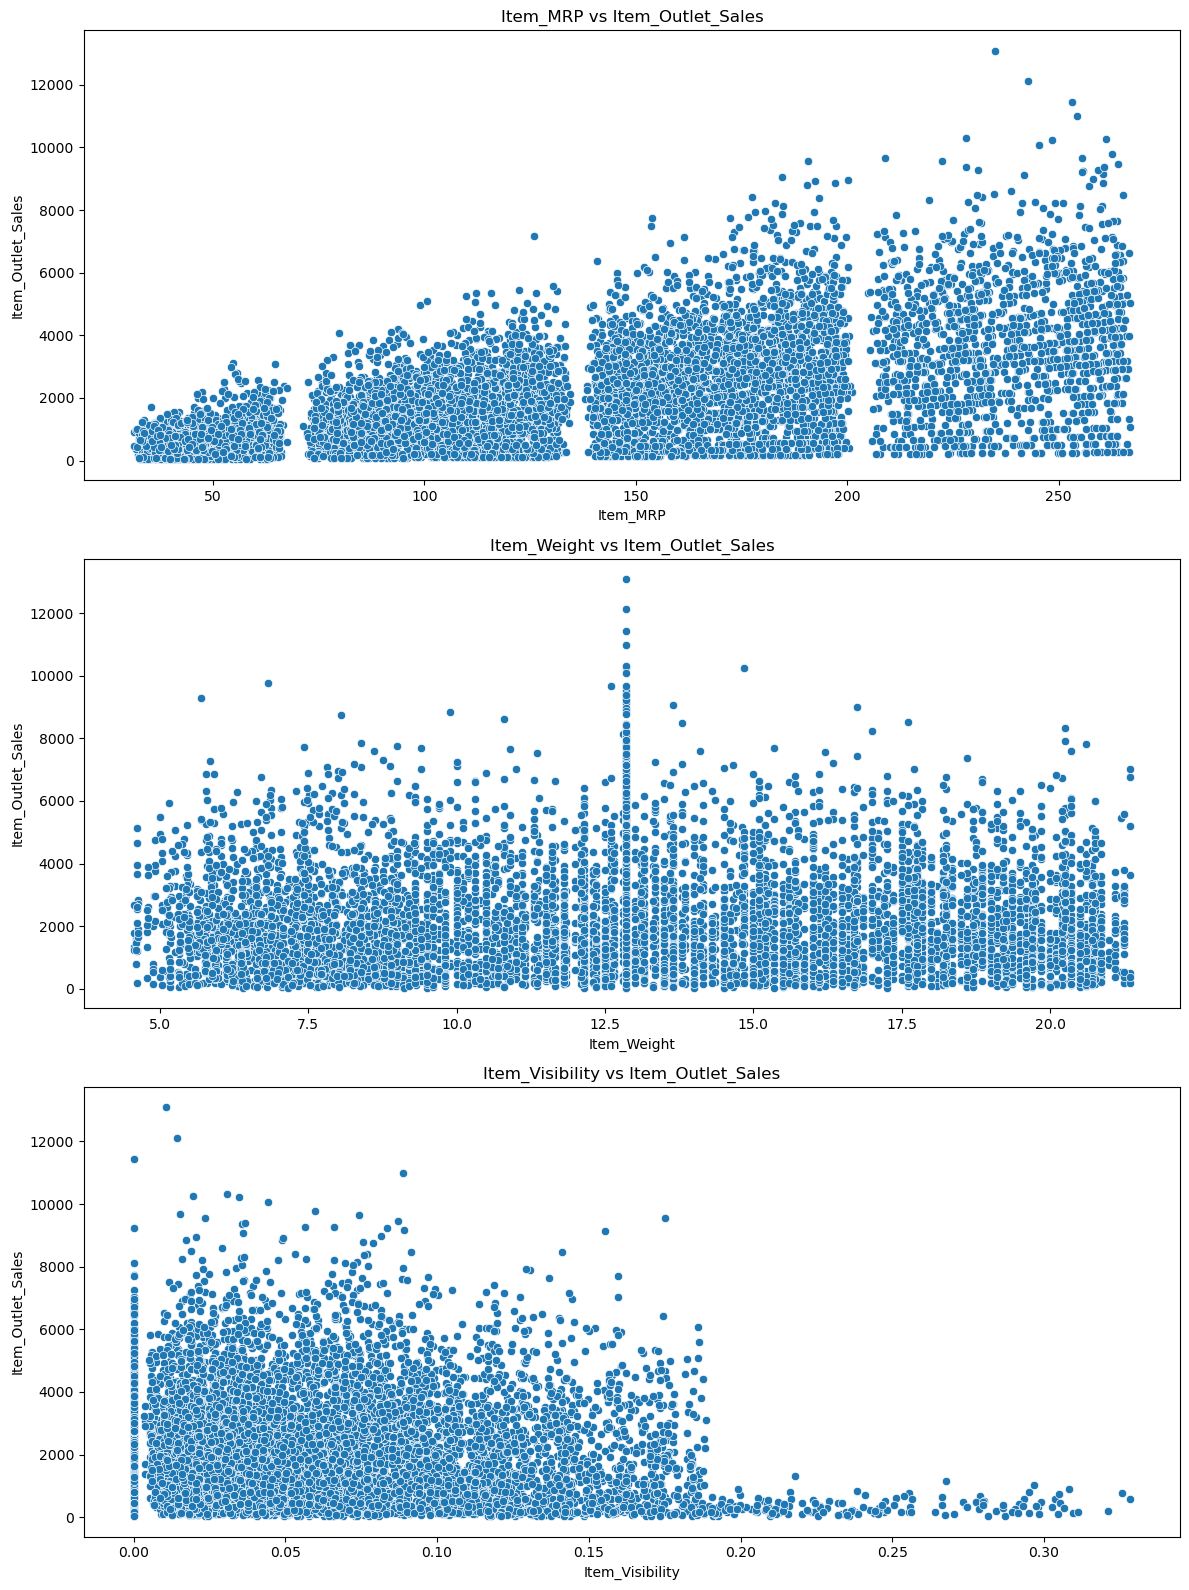

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(12,16))
target="Item_Outlet_Sales"
columns = ["Item_MRP", "Item_Weight", "Item_Visibility"]
print(f"Visualizing Quantitative Data Spread W.R.T  {target}")
for i, label in enumerate(columns):
    ax = sns.scatterplot(data=df, x=label, y=target, ax=axes[i])
    ax.set_xlabel(label)
    ax.set_ylabel(f"{target}")
    ax.set_title(f"{label} vs {target}")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Visualizing Quantitative Data Spread W.R.T  Item_Outlet_Sales


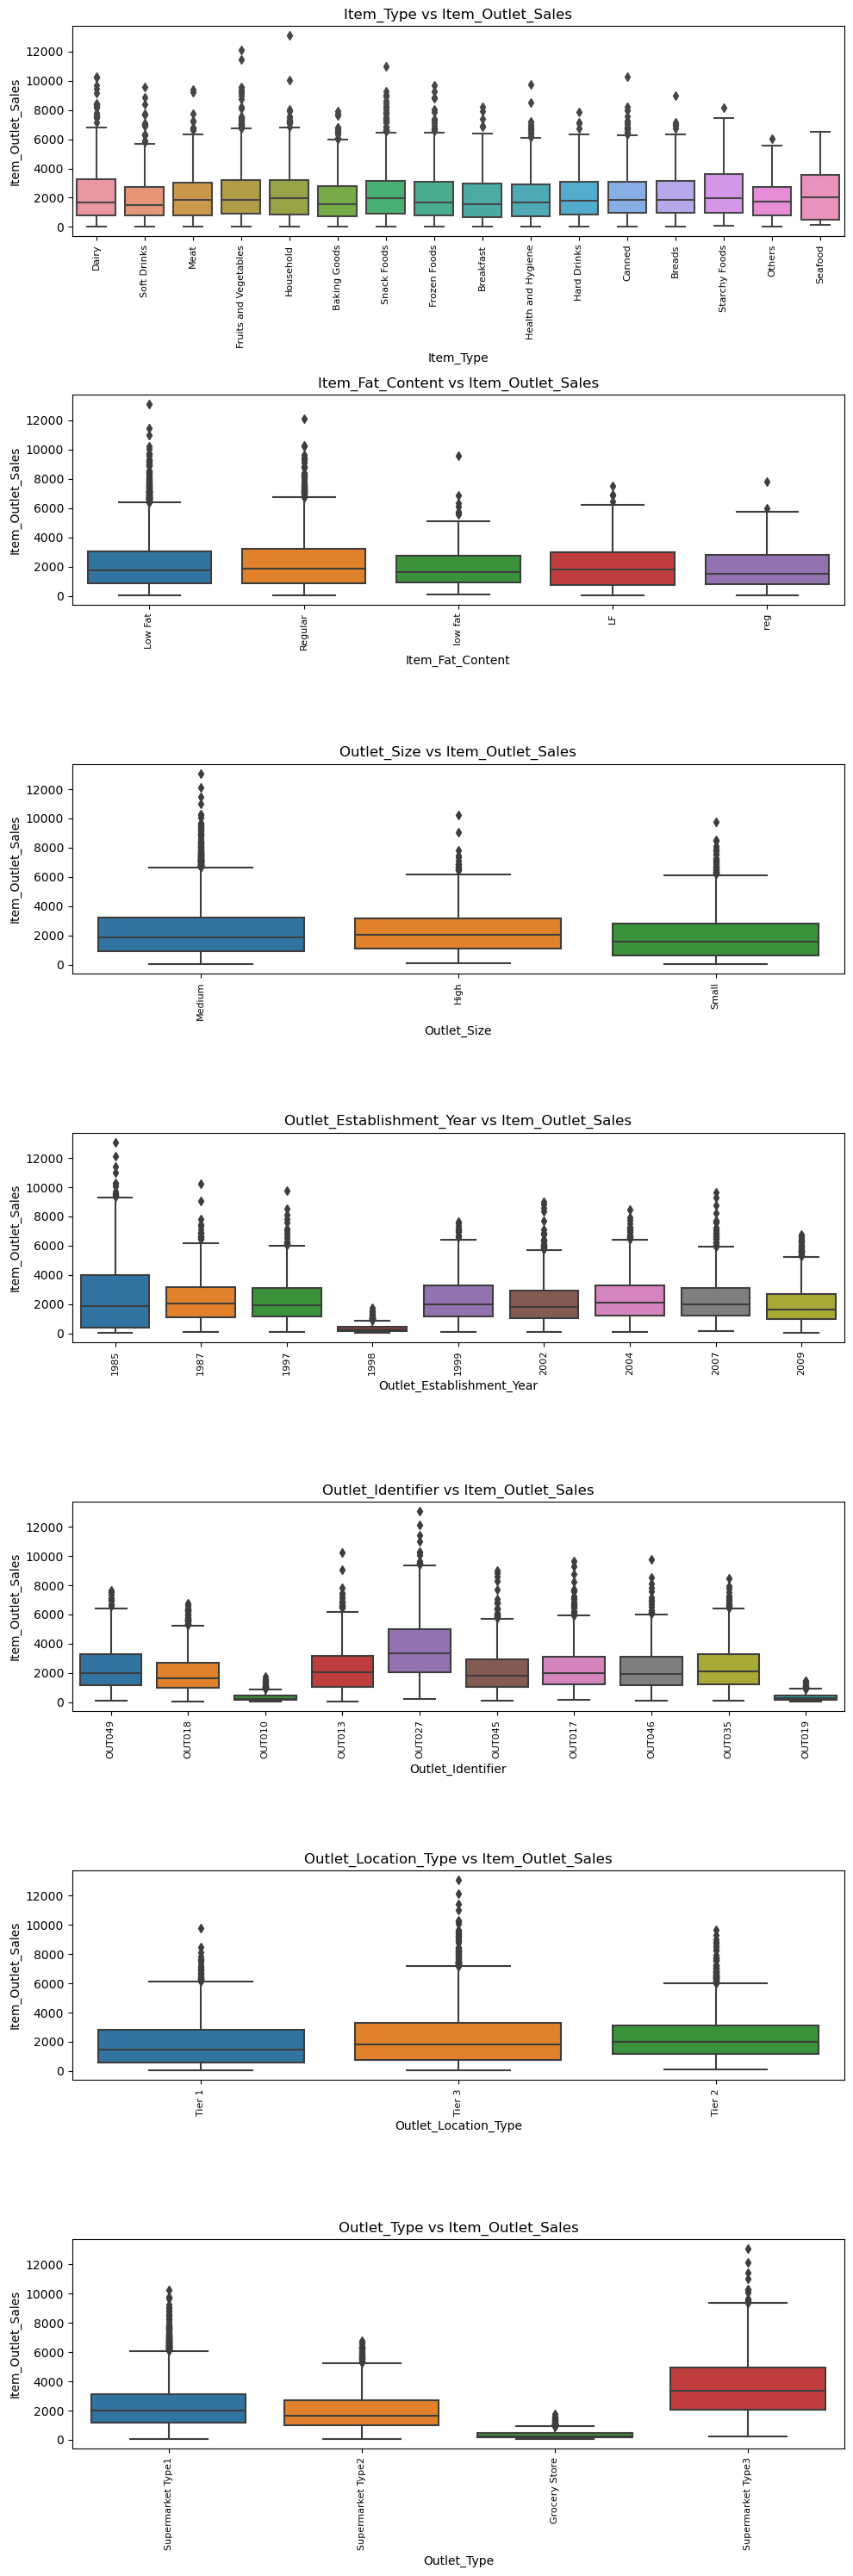

In [20]:
fig, axes = plt.subplots(7, 1, figsize=(10, 30))
target="Item_Outlet_Sales"
columns = ["Item_Type", "Item_Fat_Content", "Outlet_Size", "Outlet_Establishment_Year", "Outlet_Identifier",
           "Outlet_Location_Type", "Outlet_Type"]
print(f"Visualizing Quantitative Data Spread W.R.T  {target}")
for i, label in enumerate(columns):
    ax = sns.boxplot(data=df, x=label, y=target, ax=axes[i])
    ax.set_xlabel(label)
    ax.set_ylabel(f"{target}")
    ax.set_title(f"{label} vs {target}")
    ax.tick_params(axis='x',rotation=90, labelsize=8)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

In [21]:
print("Function to detect outliers:")
def detect_outliers(df2, feature):
    q1=df2[feature].quantile(0.25)
    q3=df2[feature].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    return upper, lower
outlier_columns=["Item_Visibility","Item_Outlet_Sales"]
for column in outlier_columns:
    upper,lower=detect_outliers(df,column)
    print(f"Upper and Lower limit of {column} are: {upper} & {lower}.")
    print(f"Removing the outliers in {column}.")
    df=df[(df[column]>lower) & (df[column]<upper)]

Function to detect outliers:
Upper and Lower limit of Item_Visibility are: 0.195979015 & -0.07440424500000001.
Removing the outliers in Item_Visibility.
Upper and Lower limit of Item_Outlet_Sales are: 6499.2067 & -2499.7460999999994.
Removing the outliers in Item_Outlet_Sales.


In [22]:
print("Making corrections in the label names of Item Fat Content")
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

df1['Item_Fat_Content'] = df1['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

Making corrections in the label names of Item Fat Content


In [23]:
current_year=datetime.now().year
print("Replacing the Outlet Establishment Year with Outlet Age.")
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']
df1['Outlet_Age'] = current_year - df1['Outlet_Establishment_Year']
del df['Outlet_Establishment_Year']
del df1['Outlet_Establishment_Year']
print("Train Data:")
display(df)
print()
print("Test Data")
display(df1)

Replacing the Outlet Establishment Year with Outlet Age.
Train Data:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,37
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,22
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,20
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,15



Test Data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,25
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,17
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,26
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,17
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,39
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,27
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,15
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,Medium,Tier 2,Supermarket Type1,22
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,Medium,Tier 2,Supermarket Type1,17


Visualizing Quantitative Data Spread


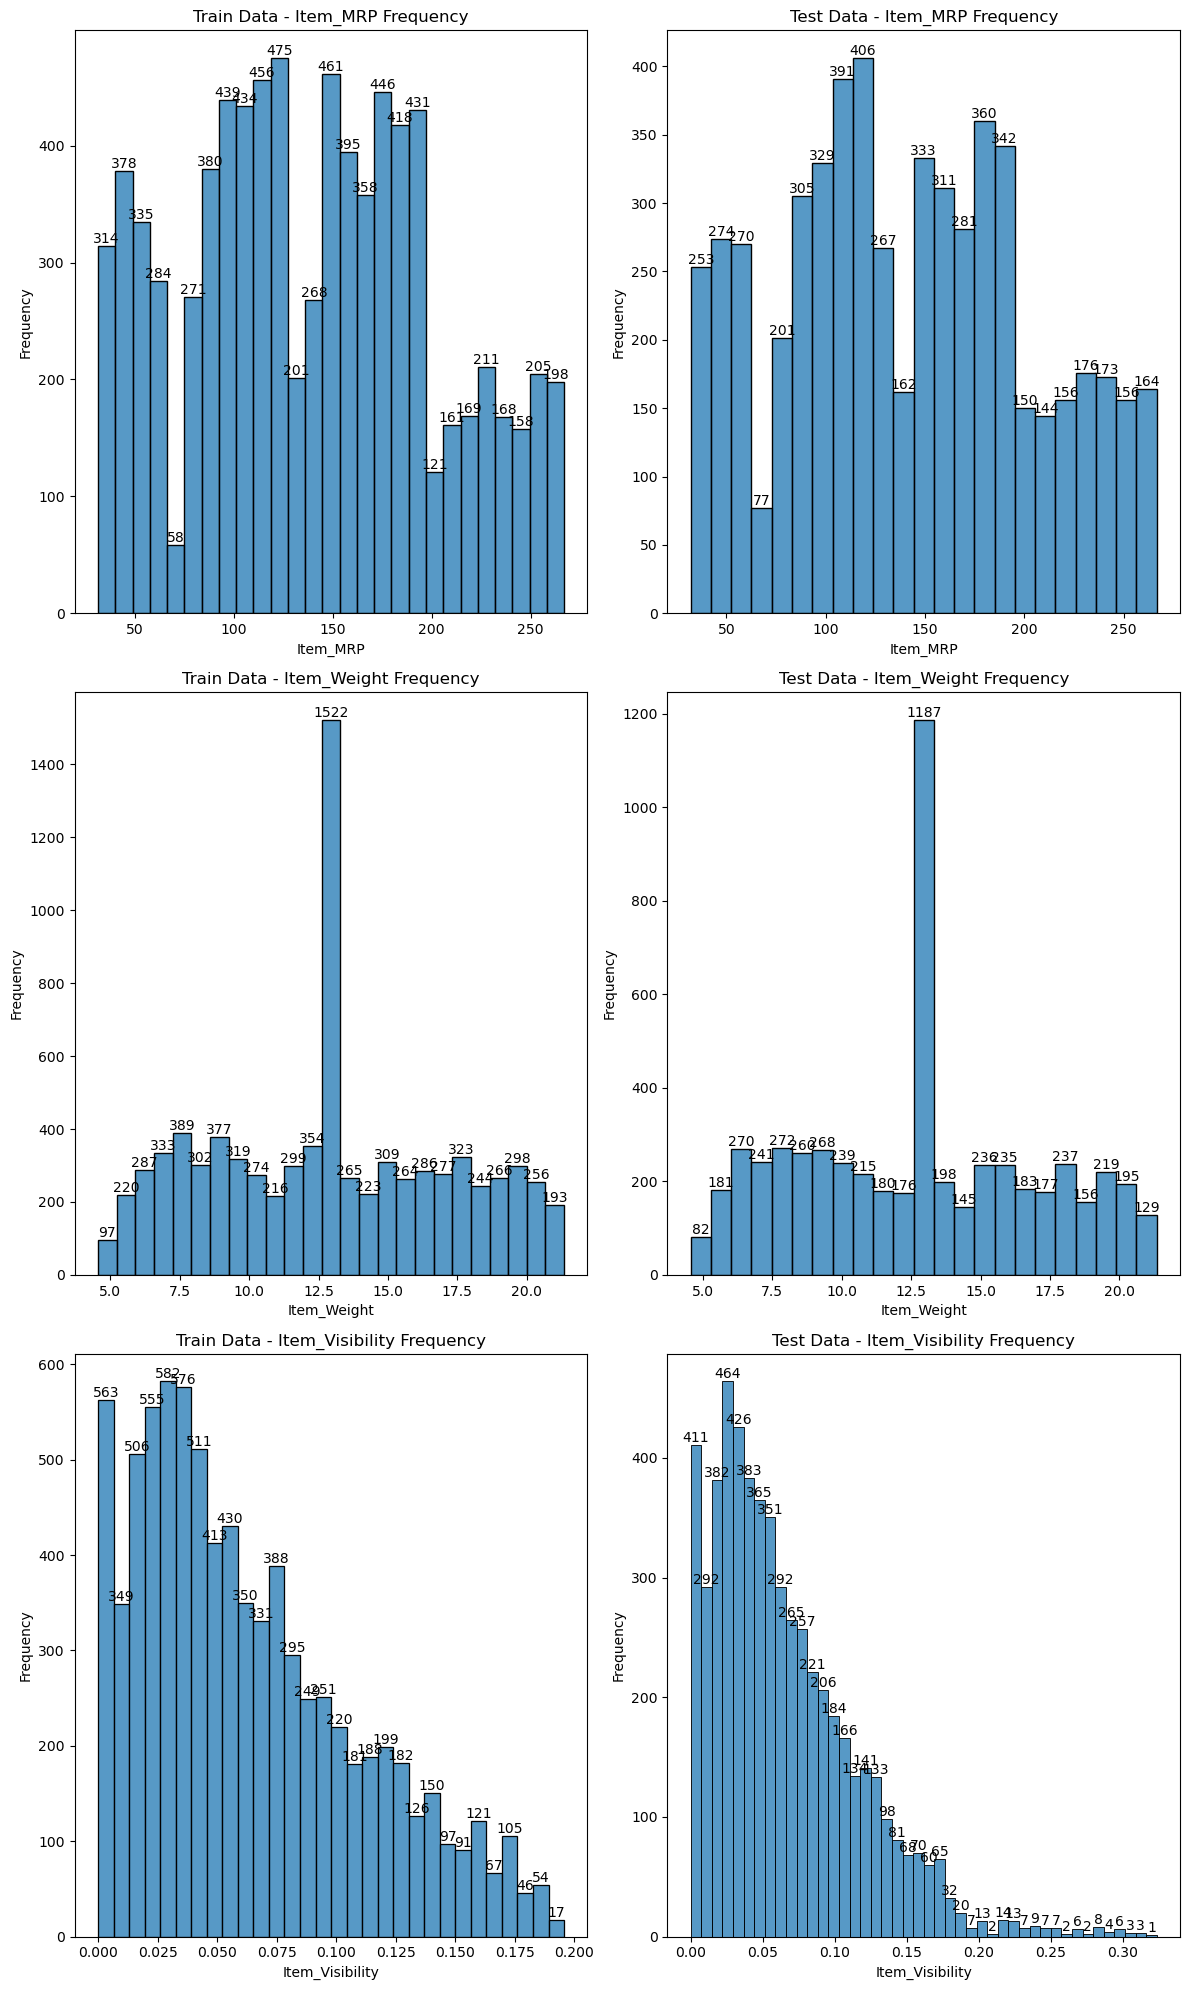

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(12, 20))
columns = ["Item_MRP", "Item_Weight", "Item_Visibility"]
print("Visualizing Quantitative Data Spread")
for i, label in enumerate(columns):
    row = i 
    ax1 = sns.histplot(df[label], ax=axes[row, 0])
    ax1.set_xlabel(label)
    ax1.set_ylabel("Frequency")
    ax1.set_title(f"Train Data - {label} Frequency")
    for container in ax1.containers:
        ax1.bar_label(container, label_type="edge")
    ax2 = sns.histplot(df1[label], ax=axes[row, 1])
    ax2.set_xlabel(label)
    ax2.set_ylabel("Frequency")
    ax2.set_title(f"Test Data - {label} Frequency")
    for container in ax2.containers:
        ax2.bar_label(container, label_type="edge")
plt.tight_layout()
plt.show()

Visualizing Discrete Data Spread


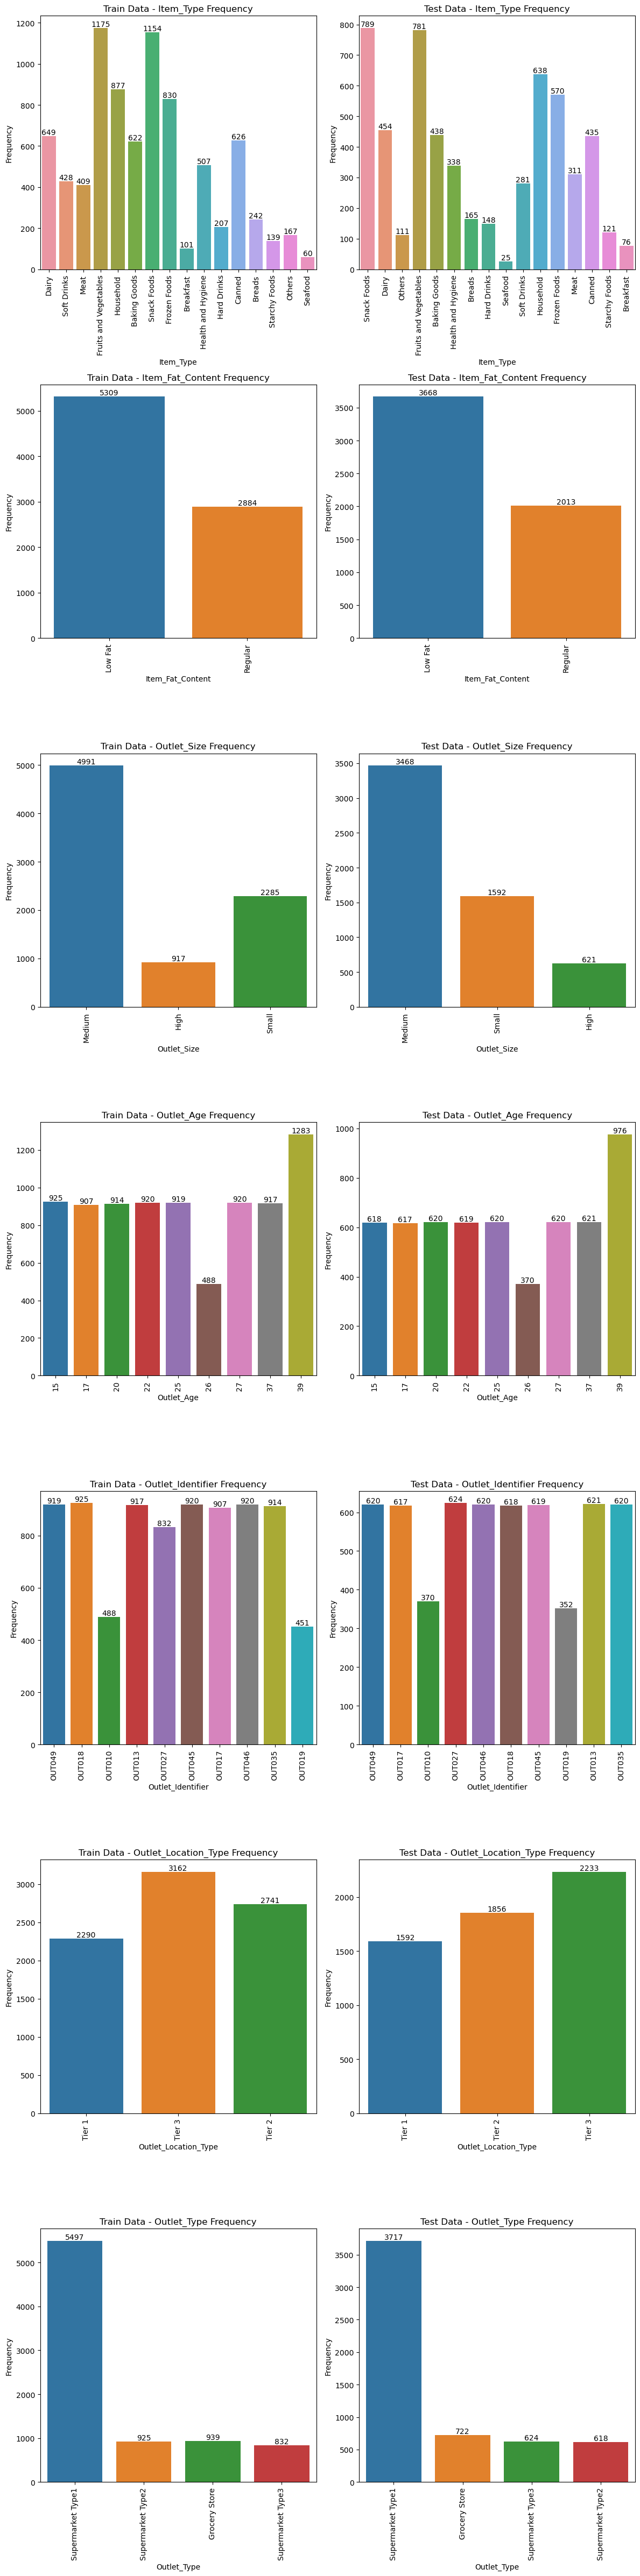

In [25]:
fig, axes = plt.subplots(7, 2, figsize=(12, 48))
columns = ["Item_Type", "Item_Fat_Content", "Outlet_Size", "Outlet_Age", "Outlet_Identifier",
           "Outlet_Location_Type", "Outlet_Type"]
print("Visualizing Discrete Data Spread")
for i, label in enumerate(columns):
    row = i 
    col1 = 0  
    ax1 = sns.countplot(data=df, x=label, ax=axes[row, col1])
    ax1.set_xlabel(label)
    ax1.set_ylabel("Frequency")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.set_title(f"Train Data - {label} Frequency")
    for container in ax1.containers:
        ax1.bar_label(container, label_type="edge")
    col2 = 1  
    ax2 = sns.countplot(data=df1, x=label, ax=axes[row, col2])
    ax2.set_xlabel(label)
    ax2.set_ylabel("Frequency")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
    ax2.set_title(f"Test Data - {label} Frequency")
    for container in ax2.containers:
        ax2.bar_label(container, label_type="edge")
plt.tight_layout()
plt.show()

Visualizing Quantitative Data Spread W.R.T  Item_Outlet_Sales


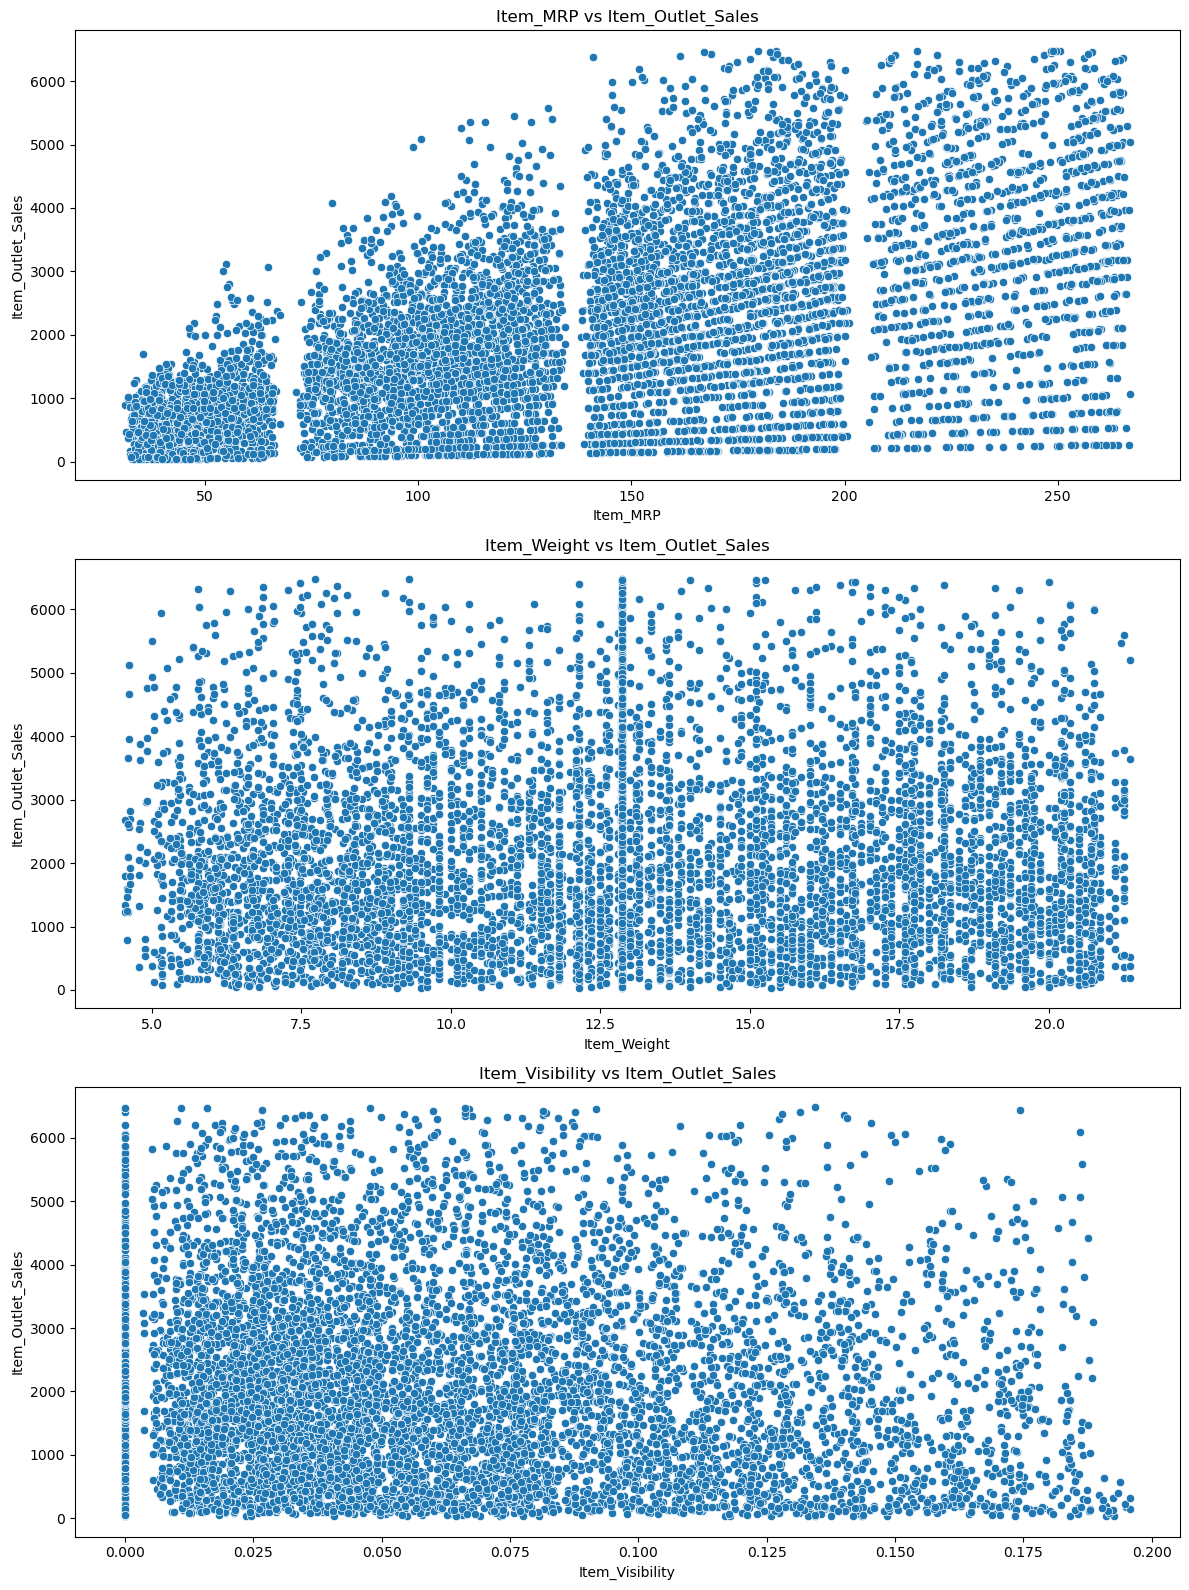

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(12,16))
target="Item_Outlet_Sales"
columns = ["Item_MRP", "Item_Weight", "Item_Visibility"]
print(f"Visualizing Quantitative Data Spread W.R.T  {target}")
for i, label in enumerate(columns):
    ax = sns.scatterplot(data=df, x=label, y=target, ax=axes[i])
    ax.set_xlabel(label)
    ax.set_ylabel(f"{target}")
    ax.set_title(f"{label} vs {target}")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Visualizing Quantitative Data Spread W.R.T  Item_Outlet_Sales


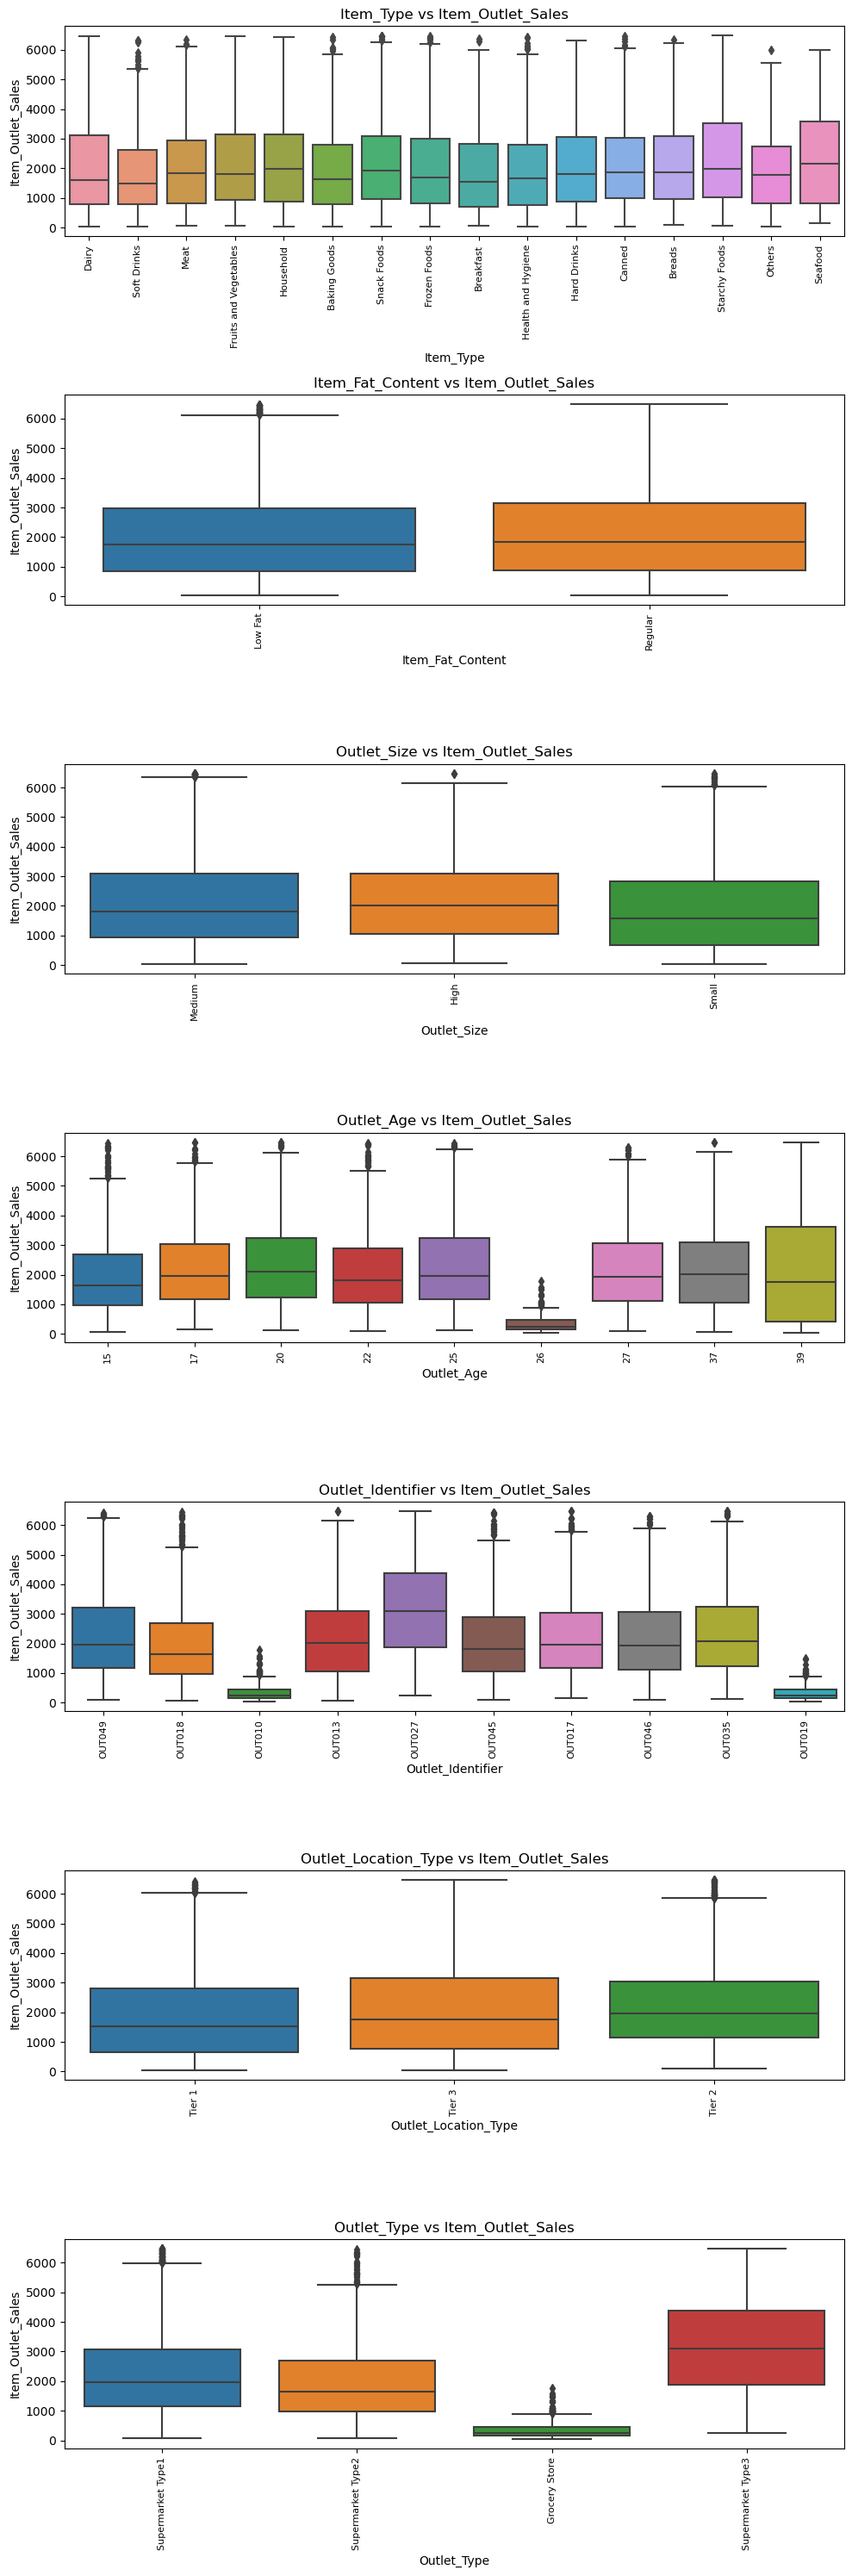

In [27]:
fig, axes = plt.subplots(7, 1, figsize=(10, 30))
target="Item_Outlet_Sales"
columns = ["Item_Type", "Item_Fat_Content", "Outlet_Size", "Outlet_Age", "Outlet_Identifier",
           "Outlet_Location_Type", "Outlet_Type"]
print(f"Visualizing Quantitative Data Spread W.R.T  {target}")
for i, label in enumerate(columns):
    ax = sns.boxplot(data=df, x=label, y=target, ax=axes[i])
    ax.set_xlabel(label)
    ax.set_ylabel(f"{target}")
    ax.set_title(f"{label} vs {target}")
    ax.tick_params(axis='x',rotation=90, labelsize=8)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

In [28]:
df['Outlet_Size'] = df['Outlet_Size'].map({'Small'  : 1,
                                                 'Medium' : 2,
                                                 'High'   : 3
                                                 }).astype(int)

df1['Outlet_Size'] =df1['Outlet_Size'].map({'Small'  : 1,
                                               'Medium' : 2,
                                               'High'   : 3
                                              }).astype(int)
print("Encoding Outlet Size for:")
print("Train Data:")
display(df)
print()
print("Test Data:")
display(df1)

Encoding Outlet Size for:
Train Data:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,2,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,2,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,3,Tier 3,Supermarket Type1,994.7052,37
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,3,Tier 3,Supermarket Type1,2778.3834,37
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2,Tier 2,Supermarket Type1,549.2850,22
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,1,Tier 2,Supermarket Type1,1193.1136,20
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2,Tier 3,Supermarket Type2,1845.5976,15



Test Data:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,2,Tier 1,Supermarket Type1,25
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2,Tier 2,Supermarket Type1,17
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,2,Tier 3,Grocery Store,26
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2,Tier 2,Supermarket Type1,17
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,2,Tier 3,Supermarket Type3,39
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1,Tier 1,Supermarket Type1,27
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2,Tier 3,Supermarket Type2,15
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2,Tier 2,Supermarket Type1,22
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2,Tier 2,Supermarket Type1,17


In [29]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].str[-1:].astype(int)
df1['Outlet_Location_Type']  = df1['Outlet_Location_Type'].str[-1:].astype(int)
print("Removing the word Tier and converting the digits to int for:")
print("Train data:")
display(df)
print()
print("Test Data:")
display(df1)

Removing the word Tier and converting the digits to int for:
Train data:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,2,1,Supermarket Type1,3735.1380,25
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,3,Supermarket Type2,443.4228,15
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,2,1,Supermarket Type1,2097.2700,25
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2,3,Grocery Store,732.3800,26
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,3,3,Supermarket Type1,994.7052,37
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,3,3,Supermarket Type1,2778.3834,37
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2,2,Supermarket Type1,549.2850,22
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,1,2,Supermarket Type1,1193.1136,20
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2,3,Supermarket Type2,1845.5976,15



Test Data:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,2,1,Supermarket Type1,25
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2,2,Supermarket Type1,17
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,2,3,Grocery Store,26
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2,2,Supermarket Type1,17
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,2,3,Supermarket Type3,39
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1,1,Supermarket Type1,27
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2,3,Supermarket Type2,15
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2,2,Supermarket Type1,22
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2,2,Supermarket Type1,17


Categorizing Item Identifier using the rule: FD-Food, NC-Non-Consumables, & DR-Drinks.


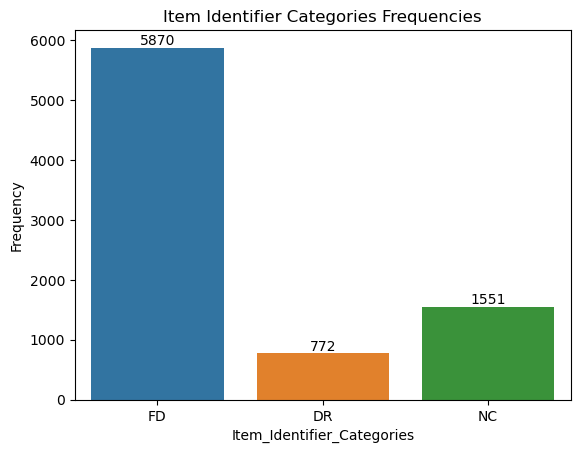

In [30]:
print("Categorizing Item Identifier using the rule: FD-Food, NC-Non-Consumables, & DR-Drinks.")
df['Item_Identifier_Categories'] = df['Item_Identifier'].str[0:2] 
df1['Item_Identifier_Categories']  = df1['Item_Identifier'].str[0:2]
ax=sns.countplot(x="Item_Identifier_Categories", data=df)
for container in ax.containers:
    ax.bar_label(container, label_type="edge")
plt.xlabel("Item_Identifier_Categories")
plt.ylabel("Frequency")
plt.title("Item Identifier Categories Frequencies")
plt.show()

In [31]:
print("Dropping the column Item Identifier:")
df.drop(columns="Item_Identifier",axis=1, inplace=True)
df1.drop(columns="Item_Identifier",axis=1, inplace=True)
print("Train Data:")
display(df)
print("Test Data:")
display(df1)

Dropping the column Item Identifier:
Train Data:


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Categories
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,2,1,Supermarket Type1,3735.1380,25,FD
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,3,Supermarket Type2,443.4228,15,DR
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,2,1,Supermarket Type1,2097.2700,25,FD
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2,3,Grocery Store,732.3800,26,FD
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,3,3,Supermarket Type1,994.7052,37,NC
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,3,3,Supermarket Type1,2778.3834,37,FD
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2,2,Supermarket Type1,549.2850,22,FD
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,1,2,Supermarket Type1,1193.1136,20,NC
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2,3,Supermarket Type2,1845.5976,15,FD


Test Data:


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Identifier_Categories
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,2,1,Supermarket Type1,25,FD
1,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2,2,Supermarket Type1,17,FD
2,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,2,3,Grocery Store,26,NC
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2,2,Supermarket Type1,17,FD
4,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,2,3,Supermarket Type3,39,FD
...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1,1,Supermarket Type1,27,FD
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2,3,Supermarket Type2,15,FD
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2,2,Supermarket Type1,22,NC
5679,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2,2,Supermarket Type1,17,FD


In [32]:
le=LabelEncoder()
ordinal_columns=["Item_Fat_Content", "Outlet_Type","Outlet_Location_Type"]
print("Label encoding the ordinal columns like:")
k=1
for column in ordinal_columns:
    print(f"{k}. {column}.")
    df[column]=le.fit_transform(df[column])
    df1[column]=le.fit_transform(df1[column])
    k+=1
print("After label Encoding:")
print("Train data:")
display(df)
print()
print("Test data:")
display(df1)

Label encoding the ordinal columns like:
1. Item_Fat_Content.
2. Outlet_Type.
3. Outlet_Location_Type.
After label Encoding:
Train data:


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Categories
0,9.300,0,0.016047,Dairy,249.8092,OUT049,2,0,1,3735.1380,25,FD
1,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2,2,2,443.4228,15,DR
2,17.500,0,0.016760,Meat,141.6180,OUT049,2,0,1,2097.2700,25,FD
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,2,2,0,732.3800,26,FD
4,8.930,0,0.000000,Household,53.8614,OUT013,3,2,1,994.7052,37,NC
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,OUT013,3,2,1,2778.3834,37,FD
8519,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2,1,1,549.2850,22,FD
8520,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,1,1,1,1193.1136,20,NC
8521,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2,2,2,1845.5976,15,FD



Test data:


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Identifier_Categories
0,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,2,0,1,25,FD
1,8.300000,1,0.038428,Dairy,87.3198,OUT017,2,1,1,17,FD
2,14.600000,0,0.099575,Others,241.7538,OUT010,2,2,0,26,NC
3,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2,1,1,17,FD
4,12.857645,1,0.118599,Dairy,234.2300,OUT027,2,2,3,39,FD
...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,Snack Foods,141.3154,OUT046,1,0,1,27,FD
5677,7.600000,1,0.142991,Starchy Foods,169.1448,OUT018,2,2,2,15,FD
5678,10.000000,0,0.073529,Health and Hygiene,118.7440,OUT045,2,1,1,22,NC
5679,15.300000,1,0.000000,Canned,214.6218,OUT017,2,1,1,17,FD


In [33]:
non_ordinal_columns=["Item_Type","Item_Identifier_Categories","Outlet_Identifier"]
df=pd.get_dummies(df, columns=non_ordinal_columns, drop_first=True, dtype=int)
df1=pd.get_dummies(df1, columns=non_ordinal_columns, drop_first=True, dtype=int)

print(f"One hot encoding the non-ordinal columns: {non_ordinal_columns}.")
print("For training data:")
display(df)
print()
print("For testing data:")
display(df1)

One hot encoding the non-ordinal columns: ['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'].
For training data:


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Breads,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0,0.016047,249.8092,2,0,1,3735.1380,25,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,1,0.019278,48.2692,2,2,2,443.4228,15,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0,0.016760,141.6180,2,0,1,2097.2700,25,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,1,0.000000,182.0950,2,2,0,732.3800,26,0,...,0,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,3,2,1,994.7052,37,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,3,2,1,2778.3834,37,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,1,0.046982,108.1570,2,1,1,549.2850,22,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,1,1,1,1193.1136,20,0,...,1,0,0,0,0,0,1,0,0,0
8521,7.210,1,0.145221,103.1332,2,2,2,1845.5976,15,0,...,0,0,0,1,0,0,0,0,0,0



For testing data:


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Type_Breads,Item_Type_Breakfast,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,20.750000,0,0.007565,107.8622,2,0,1,25,0,0,...,0,0,0,0,0,0,0,0,0,1
1,8.300000,1,0.038428,87.3198,2,1,1,17,0,0,...,0,0,1,0,0,0,0,0,0,0
2,14.600000,0,0.099575,241.7538,2,2,0,26,0,0,...,1,0,0,0,0,0,0,0,0,0
3,7.315000,0,0.015388,155.0340,2,1,1,17,0,0,...,0,0,1,0,0,0,0,0,0,0
4,12.857645,1,0.118599,234.2300,2,2,3,39,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,141.3154,1,0,1,27,0,0,...,0,0,0,0,0,0,0,0,1,0
5677,7.600000,1,0.142991,169.1448,2,2,2,15,0,0,...,0,0,0,1,0,0,0,0,0,0
5678,10.000000,0,0.073529,118.7440,2,1,1,22,0,0,...,1,0,0,0,0,0,0,1,0,0
5679,15.300000,1,0.000000,214.6218,2,1,1,17,0,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
df.to_csv("train_processed.csv")
df1.to_csv("test_possessed.csv")
print("Saving the train and test DF in the form of CSV file.")

Saving the train and test DF in the form of CSV file.


In [35]:
train_pr_dp = ["http://localhost:8888/edit/train_processed.csv"]
test_pr_dp =  ["http://localhost:8888/edit/test_possessed.csv"]

# Initialize train_path and test_path outside the loops
train_path = None
test_path = None

# Iterate over train_pr_dp
for path in train_pr_dp:
    #if os.path.exists(path):
        train_path = path

# Check if train_path is defined before printing
if train_path is not None:
    print(f"Train data extracted from {train_path}.")

# Iterate over test_pr_dp
for path in test_pr_dp:
    test_path = path

# Check if test_path is defined before printing
if test_path is not None:
    print(f"Test data extracted from {test_path}.")


Train data extracted from http://localhost:8888/edit/train_processed.csv.
Test data extracted from http://localhost:8888/edit/test_possessed.csv.


# Model Trainings, Predictions, & Performance Analysis

In [36]:
X=df.drop("Item_Outlet_Sales", axis=1)
y=df["Item_Outlet_Sales"]
print("Inputs:")
display(X)
print()
print("Outputs:")
display(y)

Inputs:


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Type_Breads,Item_Type_Breakfast,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0,0.016047,249.8092,2,0,1,25,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,1,0.019278,48.2692,2,2,2,15,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0,0.016760,141.6180,2,0,1,25,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,1,0.000000,182.0950,2,2,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,3,2,1,37,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,3,2,1,37,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,1,0.046982,108.1570,2,1,1,22,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,1,1,1,20,0,0,...,1,0,0,0,0,0,1,0,0,0
8521,7.210,1,0.145221,103.1332,2,2,2,15,0,0,...,0,0,0,1,0,0,0,0,0,0



Outputs:


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8193, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print("Shape of the X_train, X_test, y_train, & y_test:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape of the X_train, X_test, y_train, & y_test:
(6554, 34) (1639, 34) (6554,) (1639,)


In [38]:
lr=LinearRegression().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f"Applying the model:")
display(lr)
print('Training score  : {}'.format(lr.score(X_train, y_train)))
print('Test score      : {}'.format(lr.score(X_test, y_test)))

Applying the model:


LinearRegression()

Training score  : 0.5516657749034781
Test score      : 0.5471728591811286


In [39]:
lr_mse  = mean_squared_error(y_test , lr_pred)
lr_rmse = math.sqrt(lr_mse)
lr_r2   = r2_score(y_test, lr_pred)
print(f"Evaluation of {lr} model.")
print('RMSE: {}'.format(lr_rmse))
print('R2 Score: {}'.format(lr_r2))

Evaluation of LinearRegression() model.
RMSE: 1021.5214420862886
R2 Score: 0.5471728591811286


In [40]:
print("Applying Standard Scaler, Polynomial Features, and  ")
steps = [
    ('scaler', StandardScaler()),
    ('poly',   PolynomialFeatures(degree=2)),
    ('model',  LinearRegression())
       ]

lr_pipeline = Pipeline(steps)
print("Model Used:")
display(lr_pipeline)
lr_pipeline.fit(X_train, y_train)

print('Training score  : {}'.format(lr_pipeline.score(X_train, y_train)))
print('Test score      : {}'.format(lr_pipeline.score(X_test, y_test)))

Applying Standard Scaler, Polynomial Features, and  
Model Used:


Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', LinearRegression())])

Training score  : 0.599771877691452
Test score      : 0.5664830070362487


In [41]:
lr_pipeline_pred = lr_pipeline.predict(X_test)
lr_pipeline_mse  = mean_squared_error(y_test , lr_pipeline_pred)
lr_pipeline_rmse = math.sqrt(lr_pipeline_mse)
lr_pipeline_r2   = r2_score(y_test, lr_pipeline_pred)
print(f"Evaluation of {lr_pipeline} model.")
print('RMSE: {}'.format(lr_pipeline_rmse))
print('R2 Score: {}'.format(lr_pipeline_r2))

Evaluation of Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', LinearRegression())]) model.
RMSE: 999.5035140514616
R2 Score: 0.5664830070362487


In [42]:
print("Applying ridge regression:")
steps=[('scaler', StandardScaler()),('poly', PolynomialFeatures(degree=2)),
       ('model', Ridge(alpha=7, fit_intercept=True))]
ridge_pipeline=Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)
print("Model used:")
display(ridge_pipeline)
train_score=ridge_pipeline.score(X_train, y_train)
test_score=ridge_pipeline.score(X_test, y_test)
print(f"Training Score: {train_score}.")
print(f"Testing Score: {test_score}.")

Applying ridge regression:
Model used:


Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=7))])

Training Score: 0.5998213122987628.
Testing Score: 0.5662904189776015.


In [43]:
ridge_predictions = ridge_pipeline.predict(X_test)
ridge_mse  = mean_squared_error(y_test , ridge_predictions)
ridge_rmse = math.sqrt(ridge_mse)
ridge_r2   = r2_score(y_test, ridge_predictions)
print(f"Evaluation of {ridge_pipeline} model.")
print('RMSE: {}'.format(ridge_rmse))
print('R2 Score: {}'.format(ridge_r2))

Evaluation of Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=7))]) model.
RMSE: 999.7255019674704
R2 Score: 0.5662904189776015


In [44]:
print("Apply Lasso regression:")
steps = [
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2)),
            ('model', Lasso(alpha=0.2, fit_intercept=True))
        ]

lasso_pipeline = Pipeline(steps)
print("Model used:")
display(lasso_pipeline)
lasso_pipeline.fit(X_train, y_train)
print('Training score  : {}'    .format(lasso_pipeline.score(X_train, y_train)))
print('Test score      : {}'    .format(lasso_pipeline.score(X_test, y_test)))

Apply Lasso regression:
Model used:


Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.2))])

Training score  : 0.5997864842164852
Test score      : 0.566810150811661


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.647e+08, tolerance: 1.469e+06
  model = cd_fast.enet_coordinate_descent(


In [45]:
lasso_predictions = lasso_pipeline.predict(X_test)
lasso_mse  = mean_squared_error(y_test , lasso_predictions)
lasso_rmse = math.sqrt(lasso_mse)
lasso_r2   = r2_score(y_test, lasso_predictions)
print(f"Evaluation of {lasso_pipeline} model.")
print('RMSE: {}'.format(lasso_rmse))
print('R2 Score: {}'.format(lasso_r2))

Evaluation of Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.2))]) model.
RMSE: 999.1263165378849
R2 Score: 0.566810150811661


In [46]:
print("Applying Random Forest Regressor:")
rand_forest_model = RandomForestRegressor()
rand_forest_model.fit(X_train, y_train)
print("Model used:")
display(rand_forest_model)
print('Training score  : {}'.format(rand_forest_model.score(X_train, y_train)))
print('Test score      : {}'.format(rand_forest_model.score(X_test, y_test)))

Applying Random Forest Regressor:
Model used:


RandomForestRegressor()

Training score  : 0.9347666660356954
Test score      : 0.520517954771466


In [ ]:
param_dist = {
    'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

steps = [
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso())
]
print("Steps Involved:")
display(steps)

lasso_pipeline = Pipeline(steps)
print("Base model used:")
display(lasso_pipeline)

random_search = RandomizedSearchCV(
    lasso_pipeline, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)

print("Model used:")
display(random_search)

random_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(random_search.best_params_)

print("Best score found: {:.4f}".format(random_search.best_score_))

best_lasso_model = random_search.best_estimator_
print("Best model:")
display(best_lasso_model)

test_score = best_lasso_model.score(X_test, y_test)
print('Test score for the best model: {:.4f}'.format(test_score))

Steps Involved:


[('scaler', StandardScaler()),
 ('poly', PolynomialFeatures()),
 ('model', Lasso())]

Base model used:


Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso())])

Model used:


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('poly', PolynomialFeatures()),
                                             ('model', Lasso())]),
                   n_jobs=-1,
                   param_distributions={'model__alpha': [0.001, 0.01, 0.1, 1.0,
                                                         10.0, 100.0]},
                   random_state=42, verbose=1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
param_dist = {
    'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

# Define the pipeline steps
steps = [
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.2, fit_intercept=True))
]

print("Steps Involved:")
display(steps)


lasso_pipeline = Pipeline(steps)

print("Model used:")
display(lasso_pipeline)


lasso_pipeline.fit(X_train, y_train)
print('Training score: {:.4f}'.format(lasso_pipeline.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lasso_pipeline.score(X_test, y_test)))


lasso_pipeline = Pipeline(steps)

print("Base model used:")
display(lasso_pipeline)


random_search = RandomizedSearchCV(
    lasso_pipeline, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)

print("Model used:")
display(random_search)

random_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(random_search.best_params_)

print("Best score found: {:.4f}".format(random_search.best_score_))

best_lasso_model = random_search.best_estimator_
print("Best model:")
display(best_lasso_model)

test_score = best_lasso_model.score(X_test, y_test)
print('Test score for the best model: {:.4f}'.format(test_score))

In [ ]:
final_predictions = best_lasso_model.predict(X_test)

predictions_df = pd.DataFrame({'Predicted': final_predictions})
print("Final Predictions DF:")
display(predictions_df)

print("Saving the predictions to CSV file.")
predictions_df.to_csv('Final_Predictions.csv', index=False)

In [ ]:
def model_eval(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    print('The RMSE value for the model is: ', round(rmse,2))
    print('The R2 Score for the model is: ', round(r2, 2))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
preds_gb_train = gb.predict(X_train)
preds_gb_test = gb.predict(X_test)

In [ ]:
model_eval(y_train, preds_gb_train)

In [ ]:
model_eval(y_test,preds_gb_test )

In [ ]:
xgb = xg.XGBRegressor()

In [ ]:
xgb.fit(X_train, y_train)
preds_xgb_train = xgb.predict(X_train)
preds_xgb_test = xgb.predict(X_test)

In [ ]:
model_eval(y_train, preds_xgb_train)

In [ ]:
model_eval(y_test, preds_xgb_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
preds_gb_train = gb.predict(X_train)
preds_gb_test = gb.predict(X_test)
model_eval(y_train, preds_gb_train)
model_eval(y_test,preds_gb_test )